# Project Linear Regression: Boston House Price Prediction

# **Marks: 30**

Welcome to the project on Linear Regression. We will use the Boston house price data for the exercise.

-------------------------------
## Problem Statement
-------------------------------

The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

----------------------------
## Data Information
---------------------------

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- **CRIM:**     per capita crime rate by town
- **ZN:**       proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:**    proportion of non-retail business acres per town
- **CHAS:**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:**      nitric oxides concentration (parts per 10 million)
- **RM:**       average number of rooms per dwelling
- **AGE:**     proportion of owner-occupied units built before 1940
- **DIS:**      weighted distances to five Boston employment centers
- **RAD:**      index of accessibility to radial highways
- **TAX:**      full-value property-tax rate per 10,000 dollars
- **PTRATIO:**  pupil-teacher ratio by town
- **LSTAT:**    %lower status of the population
- **MEDV:**     Median value of owner-occupied homes in 1000 dollars

### Let us start by importing the required libraries

In [167]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [168]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations**
* The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.

### Get information about the dataset using the info() method

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations**
* There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* Every column in this dataset is numeric in nature.

### Let's now check the summary statistics of this dataset

#### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (1 Mark)

In [170]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**Observations:**
- Total housing data describes 506 properties within the Boston Area
- Most houses are not river bound
- Almost half the residential properties don't have proportions of residential land zoned for lots over 25,000 sq.ft.

Before performing the modeling, it is important to check the univariate distribution of the variables.

### Univariate Analysis

### Check the distribution of the variables

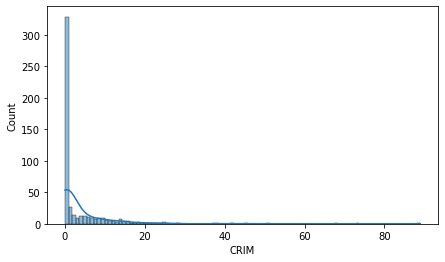

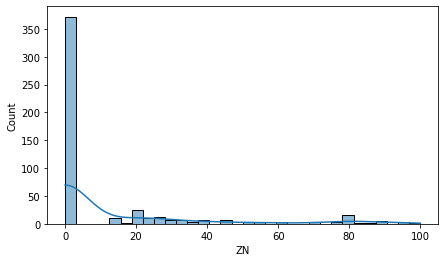

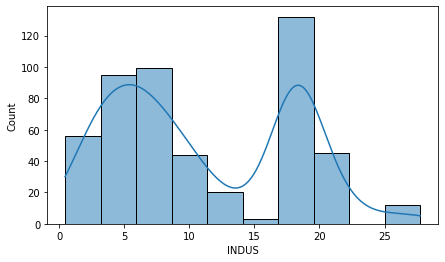

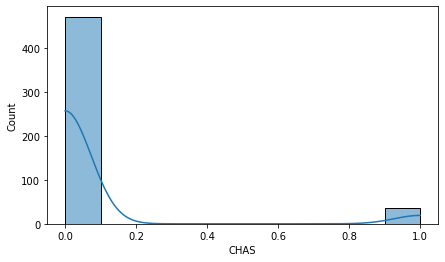

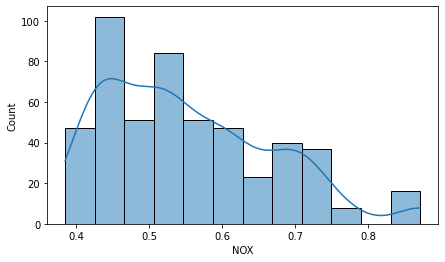

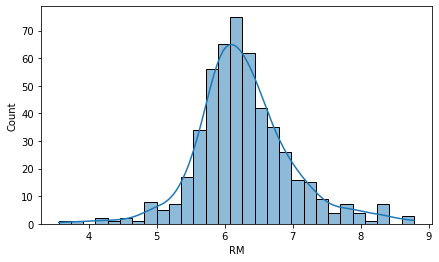

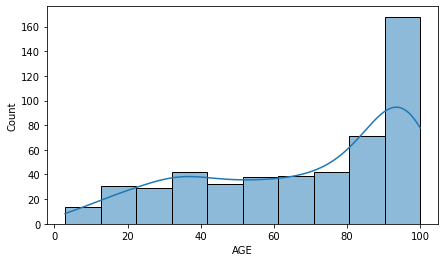

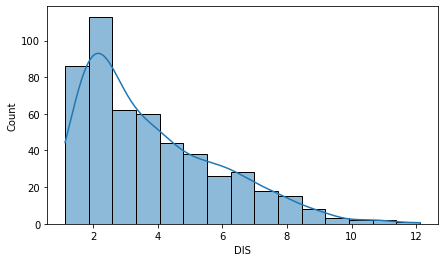

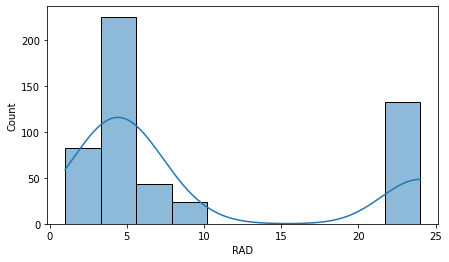

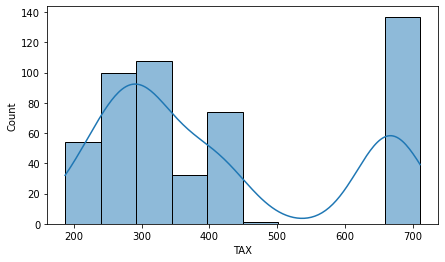

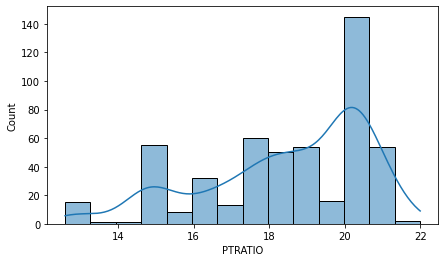

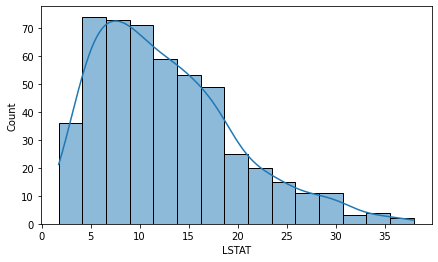

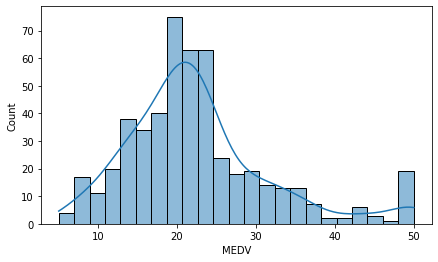

In [171]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

**Observations**
* **The variables CRIM and ZN are positively skewed.** This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.
* **The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution**, and the majority of the houses are away from Charles river (CHAS = 0).
* The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. 
* **The variable DIS** (average distances to five Boston employment centers) **has a nearly exponential distribution**, which indicates that most of the houses are closer to these employment centers.
* **The variables TAX and RAD have a bimodal distribution.**, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  
* The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [172]:
df['MEDV_log'] = np.log(df['MEDV'])

<AxesSubplot:xlabel='MEDV_log', ylabel='Count'>

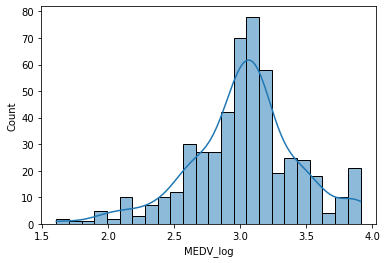

In [173]:
sns.histplot(data=df, x='MEDV_log', kde = True)

**Observations**
* The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### Bivariate Analysis

#### Let's check the correlation using the heatmap 

### **Question 2** (3 Marks):
- **Write the code to plot the correlation heatmap between the variables (1 Mark)**
- **Write your observations (2 Marks)**

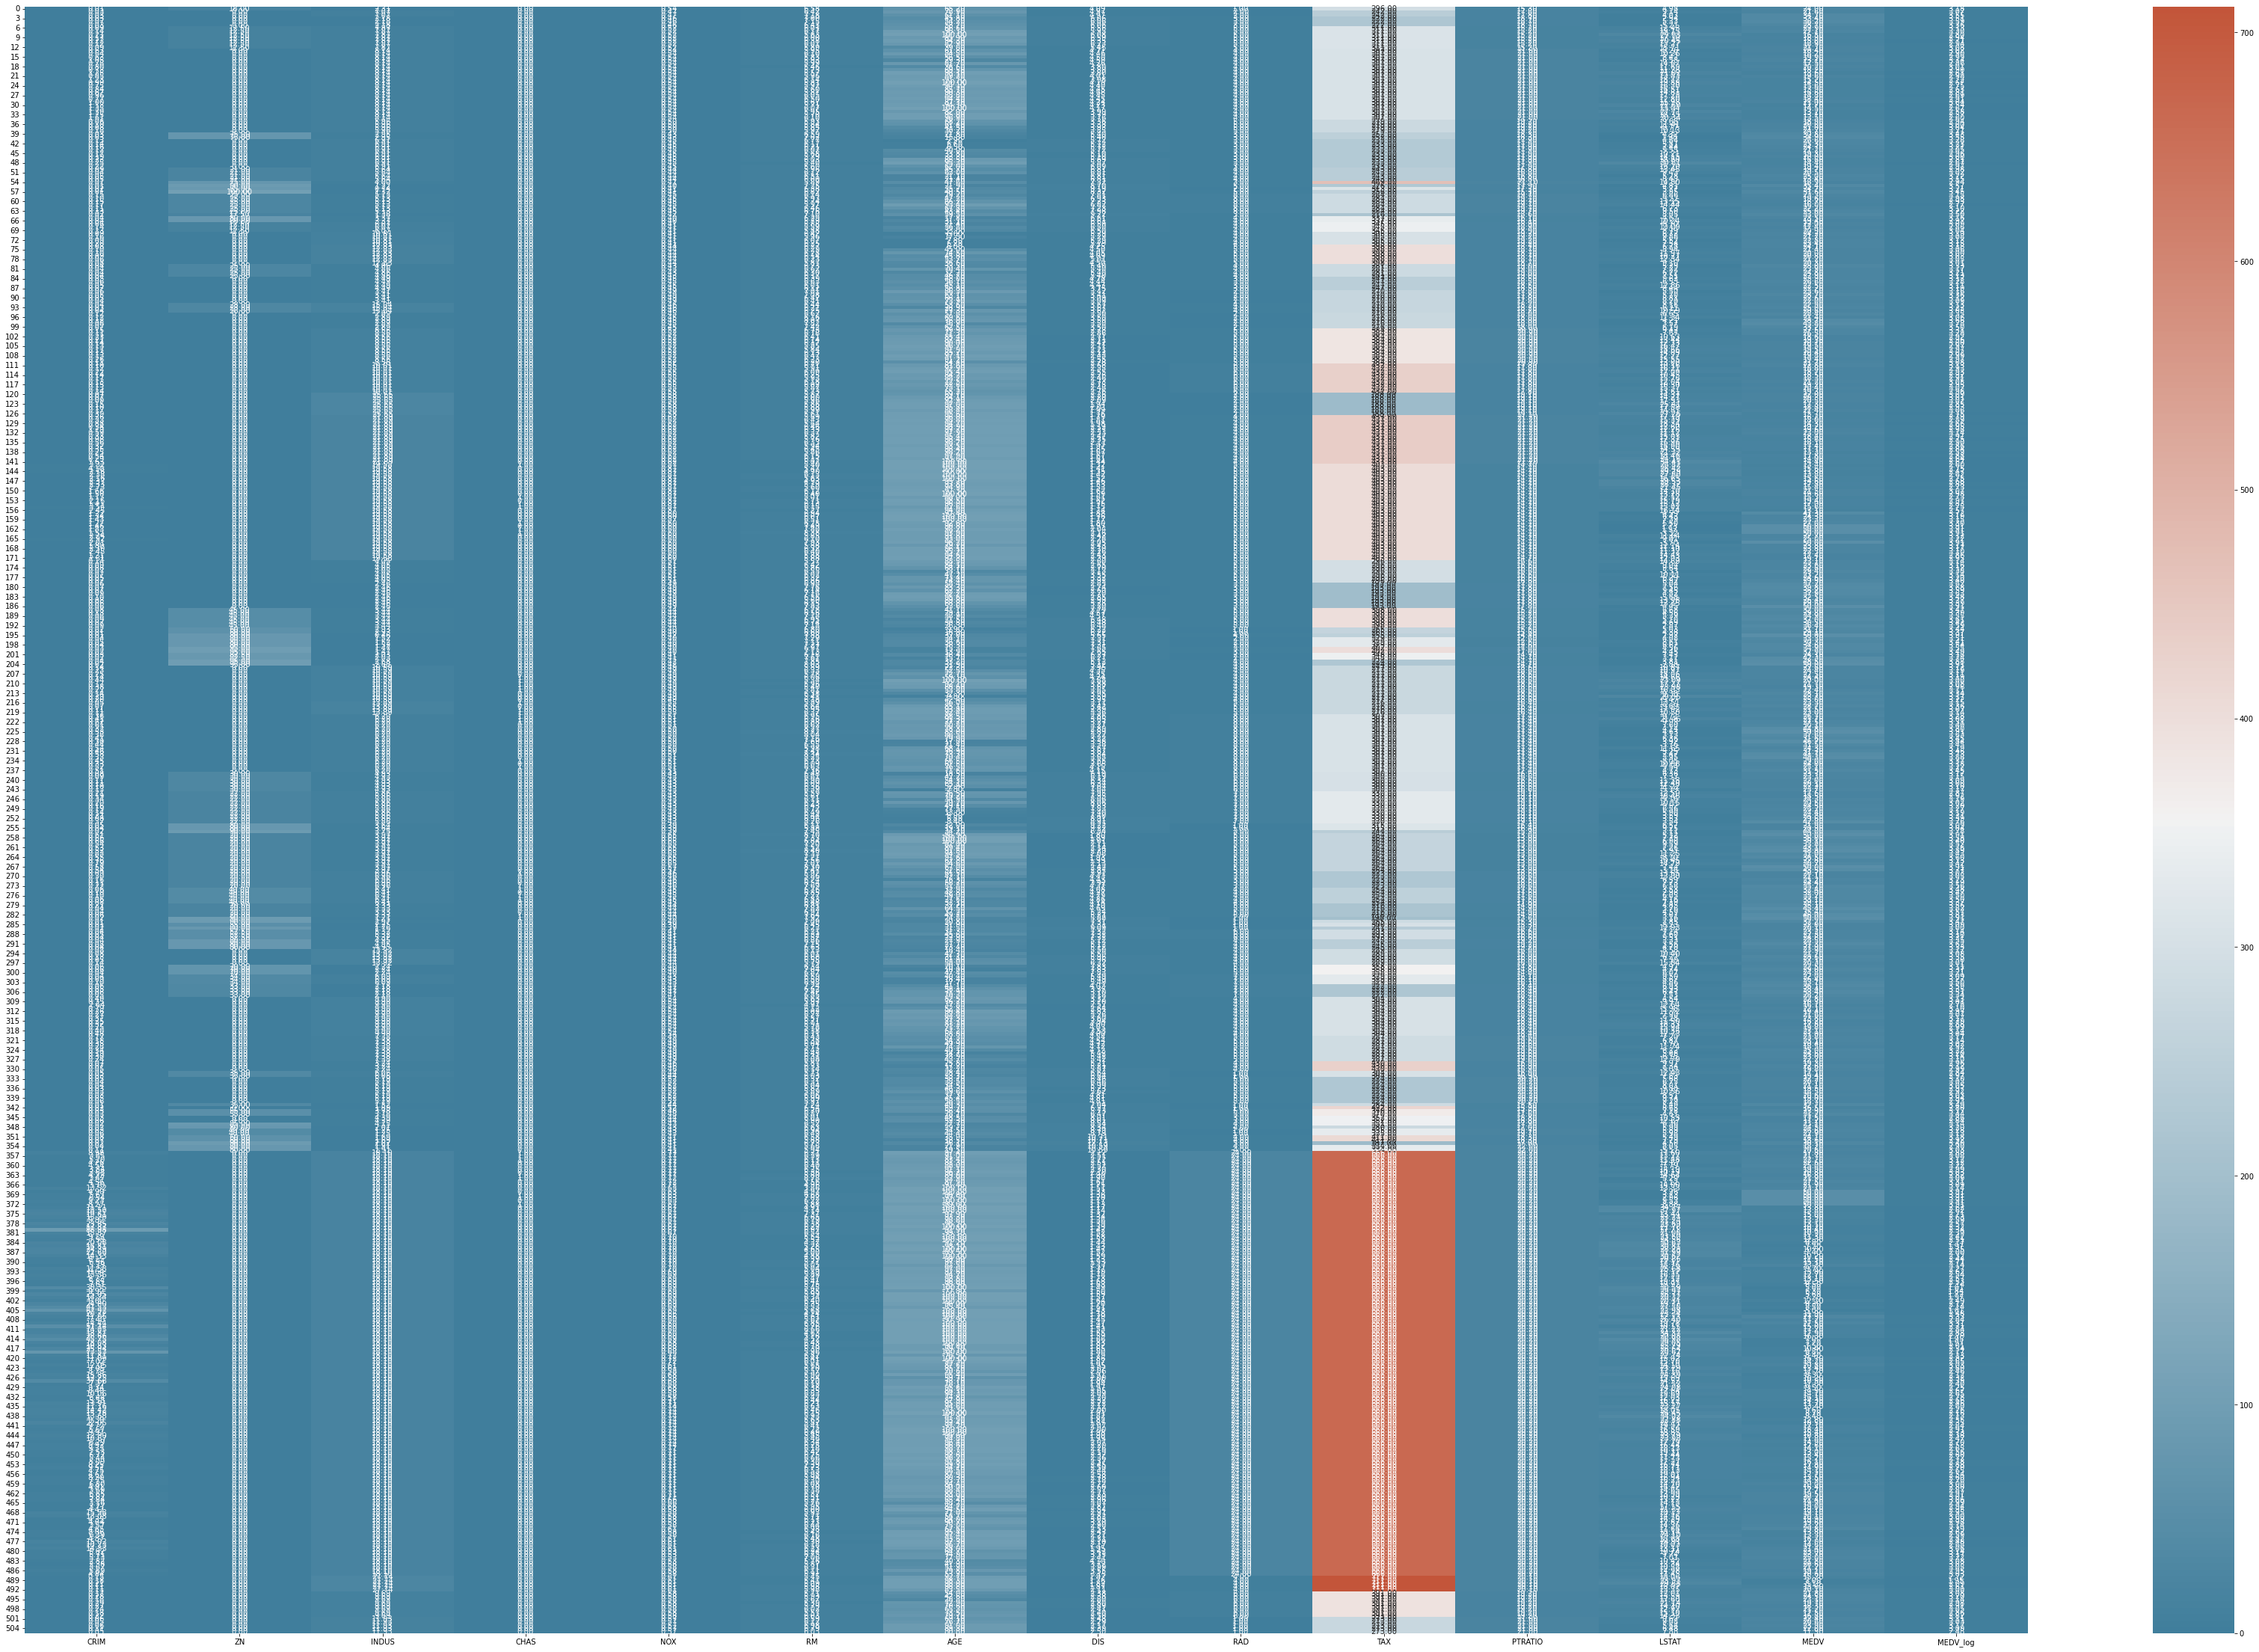

In [174]:
plt.figure(figsize=(60,40))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data=df,annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()

**Observations:**
- Tax offers a high correlation with the data set as most data points offer a value above 100

Now, we will visualize the relationship between the pairs of features having significant correlations.

### Visualizing the relationship between the features having significant correlations (> 0.7) 

### **Question 3** (6 Marks):
- **Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7) (3 Marks)**
- **Write your observations from the plots (3 Marks)**

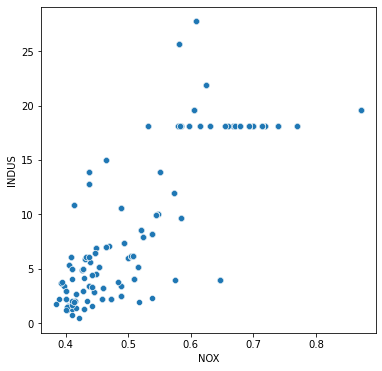

In [175]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df); #write you code here
plt.show()

**Observations:**
- There seems to be a positive linear correaltion between the two variables NOX and INDUS

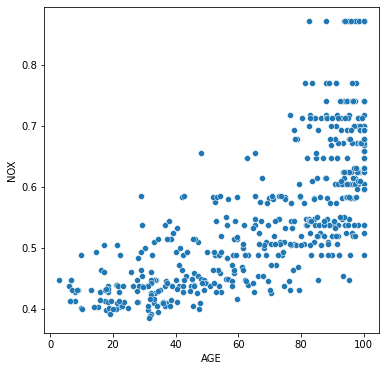

In [176]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x='AGE', y='NOX', data=df);#Write your code here
plt.show()

**Observations:**
- There seems to be a positive exponential correaltion between the two variables AGE and NOX

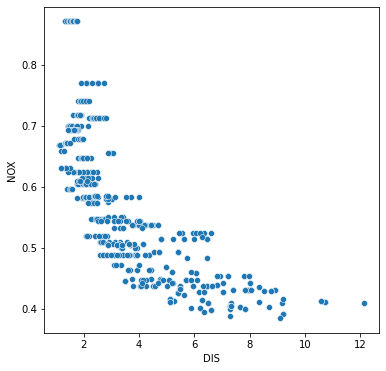

In [177]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x='DIS', y='NOX', data=df); #Write your code here
plt.show()

**Observations:**
- There seems to be a logorithmic realtionship between the variables DIS and NOX or it represents a negitive linear relationship

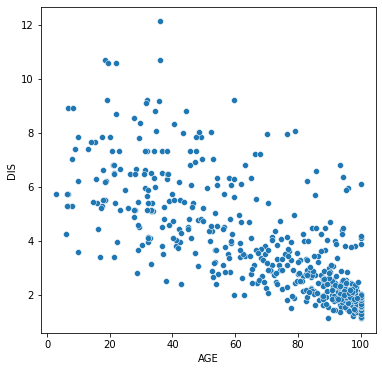

In [178]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

**Observations:**
* The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

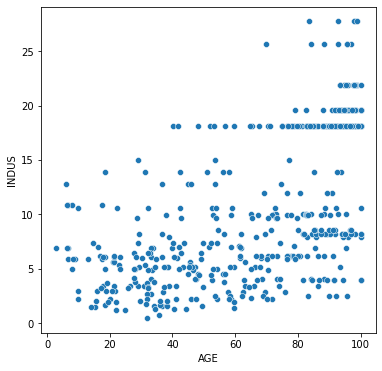

In [179]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

**Observations:**
* No trend between the two variables is visible in the above plot.

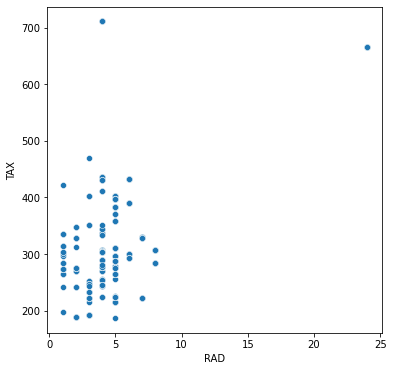

In [180]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

**Observations:**
* The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. 

Let's check the correlation after removing the outliers.

In [181]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.249757313314292


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

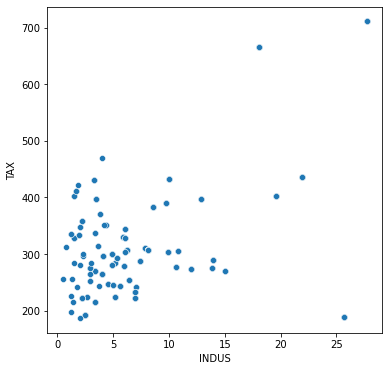

In [182]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

**Observations:**
* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

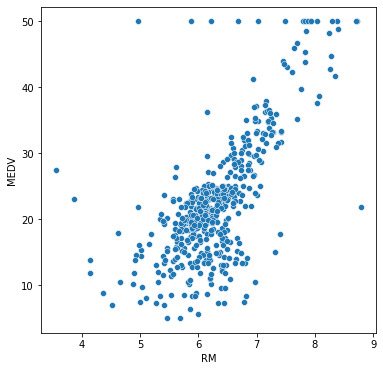

In [183]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

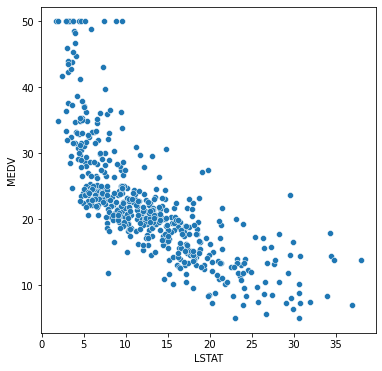

In [184]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

**Observations:**
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
* There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### Split the dataset
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [185]:
# separate the dependent and independent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)

In [186]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

Next, we will check the multicollinearity in the train dataset.

### Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**
* There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

#### **Question 4:** Drop the column 'TAX' from the training data and check if multicollinearity is removed? (1 Mark)

In [188]:
# create the model after dropping TAX
X_train = df.drop(columns = {'TAX'})
# check for VIF
print(checking_vif(X_train))

     feature         VIF
0       CRIM    2.223624
1         ZN    2.753699
2      INDUS   11.760419
3       CHAS    1.163448
4        NOX   89.613210
5         RM  145.619136
6        AGE   21.365991
7        DIS   17.714365
8        RAD    5.757486
9    PTRATIO  113.690155
10     LSTAT   12.618320
11      MEDV   78.417564
12  MEDV_log  450.871669


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

#### **Question 5:** Write the code to create the linear regression model and print the model summary. Write your observations from the model. (3 Marks)

In [210]:
#create the model
ols_model_0 = sm.OLS(Y, X)

# fitting the model
ols_res_0 = ols_model_0.fit()

# get the model summary
print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.82e-155
Time:                        01:15:07   Log-Likelihood:                 111.78
No. Observations:                 506   AIC:                            -205.6
Df Residuals:                     497   BIC:                            -167.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2560      0.199     21.348      0.0

**Observations:**
- R-squared is at 0.774 where adjusted R-squared value is 0.771

#### **Question 6:** Drop insignificant variables from the above model and create the regression model again. (2 Marks)

### Examining the significance of the model

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [207]:
# create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'})
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
ols_model_2 = sm.OLS(y_train, X_train)

# fitting the model
ols_res_2 = ols_model_2.fit()

# get the model summary
print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          2.61e-104
Time:                        01:13:11   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

**Observations:**
* We can see that the **R-squared value has decreased by 0.002**, since we have removed variables from the model, whereas the **adjusted R-squared value has increased by 0.001**, since we removed statistically insignificant variables only.

Now, we will check the linear regression assumptions.

### Check the below linear regression assumptions

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

#### **Question 7:** Write the code to check the above linear regression assumptions and provide insights. (4 Marks)

#### Check for mean residuals

In [214]:
residual = ols_res_0.resid 

In [215]:
residual.mean()

1.4643534518474892e-15

**Observations:**
- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

#### Check for homoscedasticity

* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [217]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [219]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(Y,X)
lzip(name, test)

[('F statistic', 3.1091506138988145), ('p-value', 3.0883179357282866e-18)]

**Observations:**
- As we can see from the above test the p-value is greater than 0.05, so we fail to reject the null-hypothesis. That means - residuals are homoscedastic.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

In [242]:
# predicted values
fitted = ols_res_2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residual, color="lightblue", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 354 and the array at index 1 has size 506

**Observations:_____**

#### Normality of error terms
The residuals should be normally distributed.

In [ ]:
# Plot histogram of residuals
#write your code here

In [238]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

NameError: name 'residuals' is not defined

**Observations:_____**

### Check the performance of the model on the train and test data set

#### **Question 8:** Write your observations by comparing model performance of train and test dataset (2 Marks)

In [249]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(ols_res_2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**
- The RMSE on the cross validation is 0.198 which is almost similar to the RMSE on the training dataset.
- The MAE on cross validation is 0.151 which is almost similar to the MAE on the training dataset.

#### Apply cross validation to improve the model and evaluate it using different evaluation metrics

#### **Question 9:** Apply the cross validation technique to improve the model and evaluate it using different evaluation metrics. (1 Mark)

In [254]:
# import the required function
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, y_pred_train, y_observed_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, y_pred_test, y_observed_test, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

NameError: name 'y_pred_train' is not defined

**Observations**
- The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769
- And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

#### **Question 10:** Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation. (2 Marks)

In [245]:
coef = pd.DataFrame({'Feature': ols_res_2.params.index,
'Coefs': ols_res_2.params.values}).set_index('Feature')

In [255]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	

KeyError: 0

#### **Question 11:** Write the conclusions and business recommendations derived from the model. (5 Marks)

We performed EDA - univariate and bivariate analysis on all the variables in the dataset
We then performed missing values treatment using relationship between variables
We started the model building the process with all the features
We analyzed the model summary report
Then we checked for different assumptions of linear regression
And we then fixed the model iteratively if any assumptions did not hold true
Then we evaluated the model using different evaluation metrics